> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Question that can analyised from this data set
1. Movies which had most and least profit
2. Movies with largest and lowest budgets
3. Movies with most and least earned revenu.
4. Movies with longest and shortest runtime values
5. Average runtime of all the movies.
6. In which year we had most no.of profitable movies.
7. Successful genres (with respest to the profitable movies).
8. Most frequent cast (with respest to the profitable movies)
9. Average budget (with respest to the profitable movies)
10. Average revenue (with respest to the profitable movies)
11. Average duration of the movie (with respest to the profitable movies)

In [6]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df=pd.read_csv("tmdb-movies.csv")

In [8]:
movie_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Observation
> some columns have multiple values seprated bt '|'
> Revenue column have no unit , So for my analysis i will be considering dollar as a unit


### Data Cleaning (Replace this with more specific notes!)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
"""list of columns to be deleted before starting analysis"""
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#droping
movie_df= movie_df.drop(del_col,1)
 

In [10]:
movie_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


## removing duplicate row if any


In [11]:
movie_df.drop_duplicates(keep ='first', inplace=True)

In [12]:
movie_df.duplicated().sum()

0

In [13]:
movie_df.columns[movie_df.isnull().any()]

Index(['cast', 'director', 'tagline', 'genres'], dtype='object')

In [14]:
temp_list=['budget', 'revenue']

movie_df[temp_list]=movie_df[temp_list].replace(0,np.NAN)

In [15]:
movie_df.columns[movie_df.isnull().any()]

Index(['budget', 'revenue', 'cast', 'director', 'tagline', 'genres'], dtype='object')

## Droping missing value row

In [16]:
movie_df.dropna(subset = temp_list, inplace = True)

In [17]:
movie_df.columns[movie_df.isnull().any()]

Index(['cast', 'director', 'tagline'], dtype='object')

In [18]:
#lets check the shape of the dataframe

In [19]:
movie_df.shape

(3854, 10)

In [20]:
#changing the date to datetime format for convience 

In [21]:

movie_df.release_date = pd.to_datetime(movie_df['release_date'])

In [22]:
movie_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [23]:
change_type=['budget', 'revenue']
movie_df[change_type]=movie_df[change_type].astype(np.int64)


In [24]:
movie_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1. Calculating the profit of the each movie

In [25]:
#insert 
movie_df.insert(2,'profit_earned',movie_df['revenue']-movie_df['budget'])

In [26]:
movie_df["profit_earned"].head() #PROFIT EARNED

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit_earned, dtype: int64

### Research Question 2  Movies which had most and least profit

In [27]:
high= movie_df["profit_earned"].idxmax()
low= movie_df["profit_earned"].idxmin()
high_detail=pd.DataFrame(movie_df.loc[high])
low_detail=pd.DataFrame(movie_df.loc[low])
info=pd.concat([high_detail,low_detail],axis=1)
info

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Column 1386 show maxing profit whereas column show least profit earned

## Ques 3. Movies with largest and lowest budgets

In [28]:
high= movie_df["budget"].idxmax()
low= movie_df["budget"].idxmin()
high_detail=pd.DataFrame(movie_df.loc[high])
low_detail=pd.DataFrame(movie_df.loc[low])
info=pd.concat([high_detail,low_detail],axis=1)
info

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Column 2244 has the max budget whereas column 2618 has least budget

## Question 4 : Movies with most and least earned revenue

In [29]:
high= movie_df["revenue"].idxmax()
low= movie_df["revenue"].idxmin()
high_detail=pd.DataFrame(movie_df.loc[high])
low_detail=pd.DataFrame(movie_df.loc[low])
info=pd.concat([high_detail,low_detail],axis=1)
info

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


column 1386 earned the max revenue whereas column 5067 earned least revenue

## Question 5 : Movies with longest and shortest runtime

In [30]:
high= movie_df["runtime"].idxmax()
low= movie_df["runtime"].idxmin()
high_detail=pd.DataFrame(movie_df.loc[high])
low_detail=pd.DataFrame(movie_df.loc[low])
info=pd.concat([high_detail,low_detail],axis=1)
info

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


column 2107 has max runtime of 338 minutes whereas 5162 column has least runtime of 15 minute

## Question 6 : Average runtime of the movies

In [31]:
movie_df["runtime"].mean()

109.22029060716139

Average runtime of a movie is approx 109 min

## ploting hist for runtime of movies

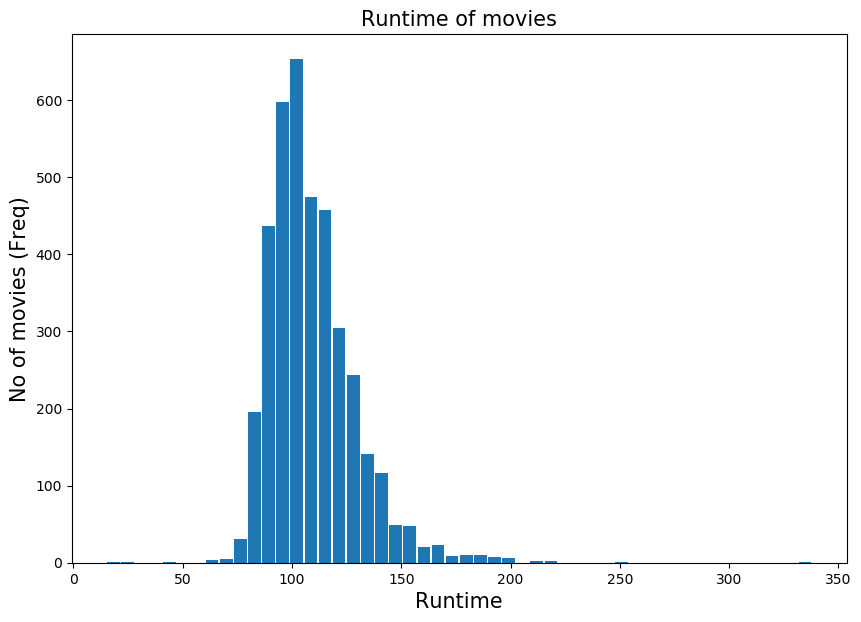

In [32]:
plt.figure(figsize=(10,7),dpi = 100)
plt.hist(movie_df["runtime"],rwidth = 0.9,bins =50)

plt.title("Runtime of movies",fontsize=15)
plt.xlabel("Runtime" ,fontsize=15)
plt.ylabel("No of movies (Freq)",fontsize=15)
plt.show()

According to the above graph it is clear that number of movie with a runtime of 80-140 min are greater as compared to other runtime



## Question 7 : Year of release vs Profitabilit

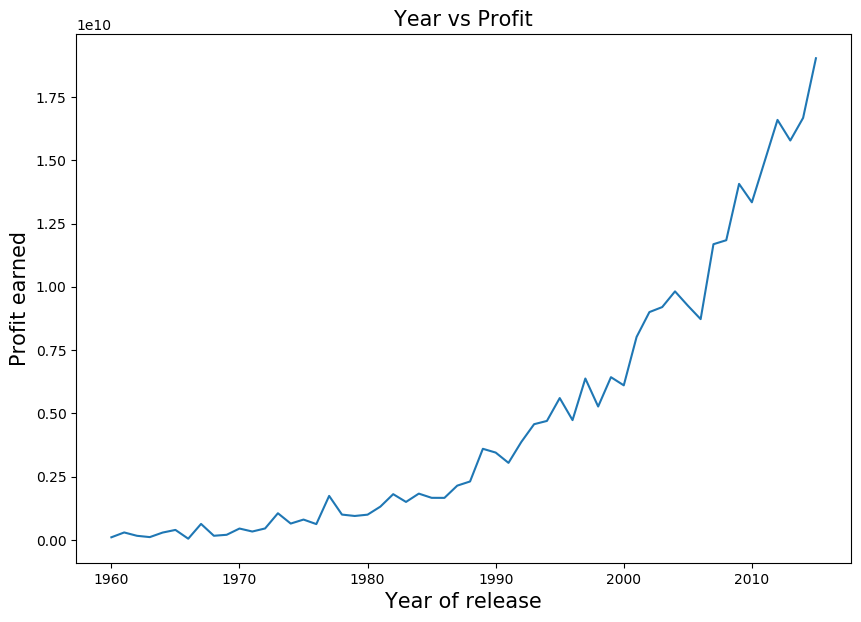

In [33]:
profits_year = movie_df.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(10,7),dpi=100)
plt.xlabel("Year of release",fontsize=15)
plt.ylabel("Profit earned",fontsize=15)
plt.title("Year vs Profit",fontsize=15)

plt.plot(profits_year)
plt.show()

Movie released after 2008 earn more money as compared to other years

In [34]:
profits_year.idxmax()

2015

year 2015 earned max profit 


## now again we clean our data to find which genres perform better then other 
### lets consider movies which earned earned more revenue let us take 40 million dollar for this 

In [35]:
profits_data=movie_df.query("profit_earned >=40000000")

In [36]:
len(profits_data)

1493

Now the size of data set is reduced to 1493


# Question 8 : Succesful Genres

In [37]:
#function take a column name and keep count of values which are seprated by '|'

def val_data(column):
    val_data=profits_data[column].str.cat(sep='|')
    val_data = pd.Series(val_data.split('|'))
    count = val_data.value_counts(ascending = False)
    return count

In [38]:

count_genre=val_data("genres")
count_genre.head()

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64

### Top 5 genres

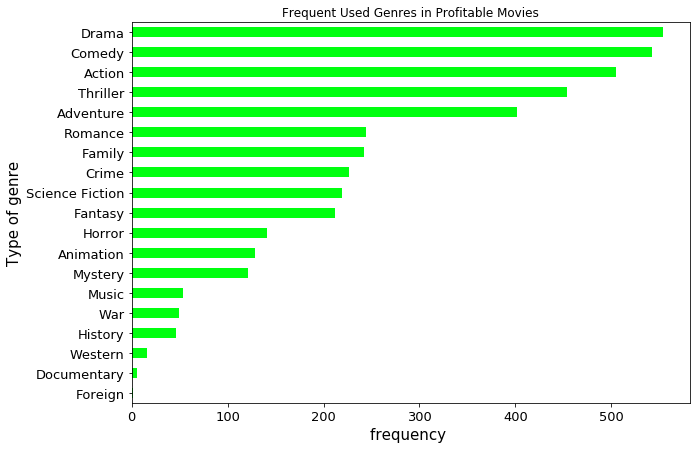

In [45]:
#visual representation
count_genre.sort_values(inplace=True,ascending=True)
plt.xlabel("frequency ",fontsize=15)
plt.ylabel("Type of genre",fontsize=15)
count_genre.plot(title = 'Frequent Used Genres in Profitable Movies',fontsize=13 ,kind="barh",figsize=(10,7),color = '#00FF0F');

Drama genre earned max profit followed by Comedy ana action



# Question 9 : Most Frequent Cast


In [40]:
cast=val_data("cast")
cast.head( )

Tom Cruise      27
Tom Hanks       26
Brad Pitt       25
Cameron Diaz    22
Bruce Willis    21
dtype: int64

## Top 5 cast
tom cruise on the top

## Question 10 : Average budget of movie

In [41]:
profits_data.budget.mean()

57308877.08305425

Avevrage budget of movie with profit of 40 milion is 57 million

## Question 11 : Average Revenue earned by the movies

In [42]:
profits_data.revenue.mean()

236306323.37374413

Average revenue of movie with a profit of 40 milion is 236 milion

## Question 12 : Average runtime of movie

In [43]:
profits_data.runtime.mean()

113.19624916275954

Average runtime is 113 minute




# Conclusion

#### This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

##### For a Movie to be in successful criteria

1. Average Budget must be around 60 millon dollar
2. Average duration of the movie must be 113 minutes
3. Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
4. Genre must be : Action, Adventure, Thriller, Comedy, Drama.

By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.


## Limitation
This analysis was done considering the movies which had a significant amount of profit of around 40 million dollar.
As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.
Droping the row with missing value may affect the accuracy